In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, accuracy_score ,confusion_matrix
df=pd.read_csv('creditcard_2023.csv')


In [37]:
print(df.head())

   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

In [38]:
print(df.tail())

            id        V1        V2        V3        V4        V5        V6  \
568625  568625 -0.833437  0.061886 -0.899794  0.904227 -1.002401  0.481454   
568626  568626 -0.670459 -0.202896 -0.068129 -0.267328 -0.133660  0.237148   
568627  568627 -0.311997 -0.004095  0.137526 -0.035893 -0.042291  0.121098   
568628  568628  0.636871 -0.516970 -0.300889 -0.144480  0.131042 -0.294148   
568629  568629 -0.795144  0.433236 -0.649140  0.374732 -0.244976 -0.603493   

              V7        V8        V9  ...       V21       V22       V23  \
568625 -0.370393  0.189694 -0.938153  ...  0.167503  0.419731  1.288249   
568626 -0.016935 -0.147733  0.483894  ...  0.031874  0.388161 -0.154257   
568627 -0.070958 -0.019997 -0.122048  ...  0.140788  0.536523 -0.211100   
568628  0.580568 -0.207723  0.893527  ... -0.060381 -0.195609 -0.175488   
568629 -0.347613 -0.340814  0.253971  ...  0.534853 -0.291514  0.157303   

             V24       V25       V26       V27       V28    Amount  Class  
5686

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [40]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [41]:
# checking valid and fraud transactions

fraud=df[df['Class']==1]
valid=df[df['Class']==0]
print("Fraud Transactions",len(fraud))
print(" Valid Transactions",len(valid))

print(fraud.shape)
print(valid.shape)

Fraud Transactions 284315
 Valid Transactions 284315
(284315, 31)
(284315, 31)


C:\Users\nupur\AppData\Local\Temp\ipykernel_37220\3714787475.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='dark')


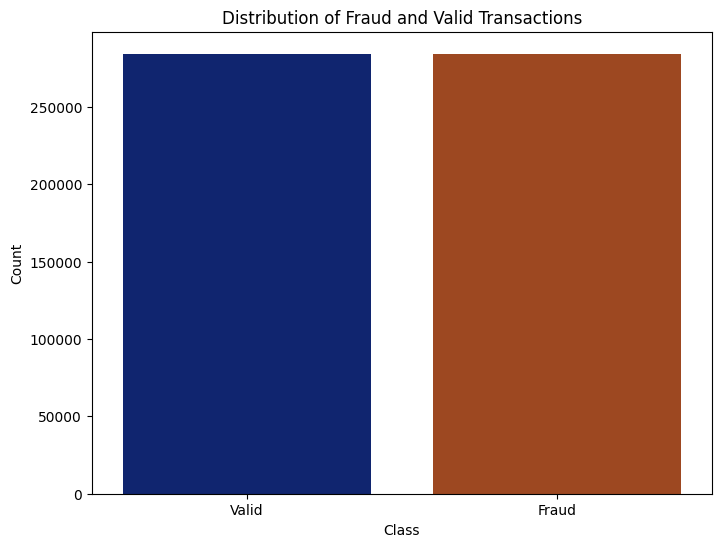

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df, palette='dark')
plt.title('Distribution of Fraud and Valid Transactions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Valid', 'Fraud'])
plt.show()

## Spliting data to test and train datasets

In [15]:
xdata=df.drop(['Class'],axis=1)
ydata=df['Class']

xdata=xdata.values
ydata=ydata.values



In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.2, random_state=42)

print(xdata.shape,X_train.shape,X_test.shape)

(568630, 30) (454904, 30) (113726, 30)


### Building and Testing the Models

In [20]:
from sklearn.ensemble import RandomForestClassifier

rfcmodel=RandomForestClassifier()

rfcmodel.fit(X_train,y_train)

ypred_rfc=rfcmodel.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, ypred_rfc)
classification_rep = classification_report(y_test, ypred_rfc)
conf_matrix = confusion_matrix(y_test, ypred_rfc)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9998241387193781
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
 [[56745     5]
 [   15 56961]]


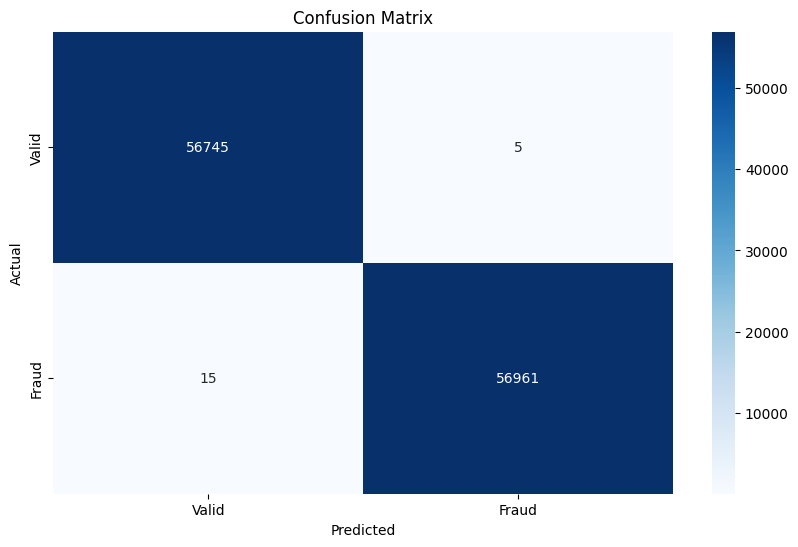

In [22]:

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Valid', 'Fraud'], yticklabels=['Valid', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Make predictions
ypred_logreg = logreg_model.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, ypred_logreg)
classification_rep = classification_report(y_test, ypred_logreg)
conf_matrix = confusion_matrix(y_test, ypred_logreg)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.7893533580711535
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.66      0.76     56750
           1       0.73      0.92      0.81     56976

    accuracy                           0.79    113726
   macro avg       0.81      0.79      0.79    113726
weighted avg       0.81      0.79      0.79    113726



Confusion Matrix:
 [[37596 19154]
 [ 4802 52174]]


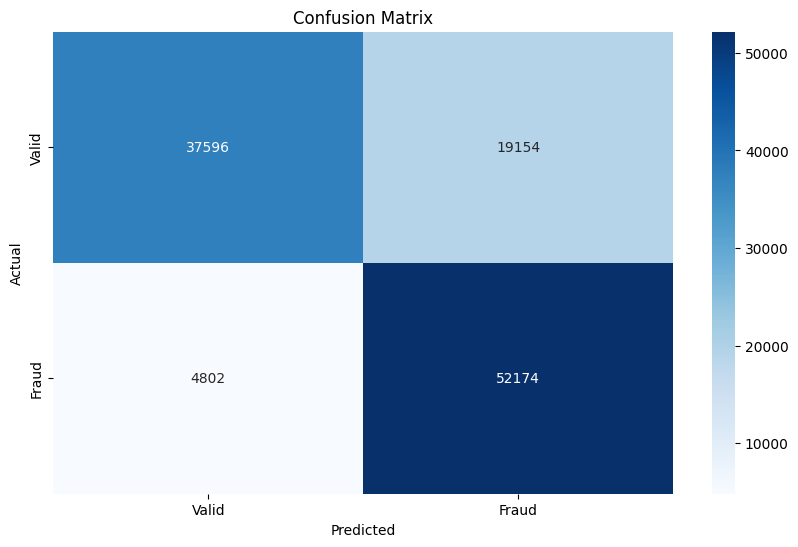

In [25]:
print("Confusion Matrix:\n", conf_matrix)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Valid', 'Fraud'], yticklabels=['Valid', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()

dtc.fit(X_train,y_train)

ypred_dtc=dtc.predict(X_test)

Accuracy: 0.9995339676063522
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
 [[56718    32]
 [   21 56955]]


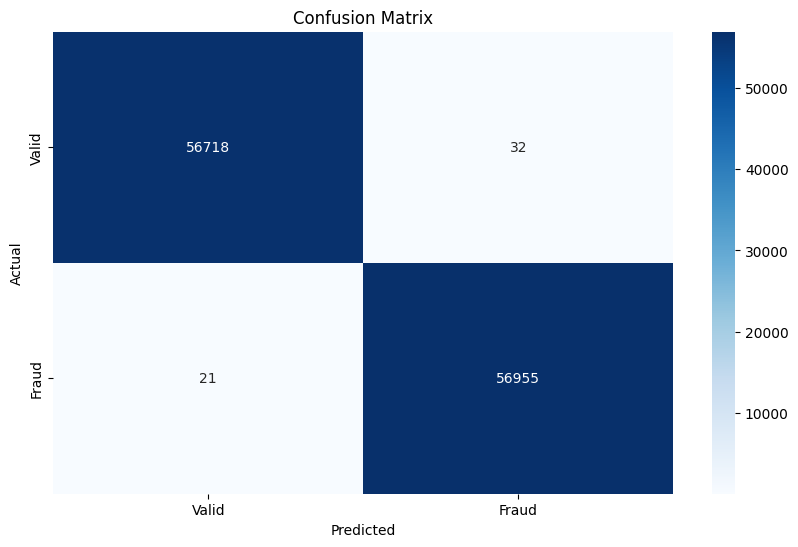

In [27]:
accuracy = accuracy_score(y_test, ypred_dtc)
classification_rep = classification_report(y_test, ypred_dtc)
conf_matrix = confusion_matrix(y_test, ypred_dtc)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Valid', 'Fraud'], yticklabels=['Valid', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Accuracy of Different models

### Random Forest Classifier:   0.9998241387193781
### Logistic Regression:        0.7893533580711535
### Decision Tree Classifier:   0.9995339676063522

In [31]:
#checking accuracy on test data

X_test_pred= rfcmodel.predict(X_test)
test_data_acc=accuracy_score(X_test_pred,y_test)
print(test_data_acc)

0.9998241387193781


In [32]:
import joblib

joblib.dump(rfcmodel,"FraudDetectionModel.pkl")

['FraudDetectionModel.pkl']

In [33]:
modelrfc=joblib.load("FraudDetectionModel.pkl")

In [35]:
pred = modelrfc.predict([[-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,0.462387777762292,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62]])
# 30 features

In [36]:
if pred[0] == 0:
    print("Valid Transcation")
else:
    print("Fraud Transcation")

Valid Transcation
